In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
ogTrainData = pd.read_csv('train.csv')
ogTestData = pd.read_csv('test.csv')

trainData = ogTrainData.copy()






# Feature Engineering

### Changing Base Table

In [45]:
def edit_data(df):
    df.rename(columns={
    "source_1_temperature" : "heater-1",
    "source_2_temperature" : "hvac-1",
    "source_3_temperature" : "hvac-2",
    "source_4_temperature" : "heater-2",
    }, inplace=True)
    df.rename(columns={
        "source_1_temperature" : "heater-1",
        "source_2_temperature" : "hvac-1",
        "source_3_temperature" : "hvac-2",
        "source_4_temperature" : "heater-2",
    }, inplace=True)
    df["measurement_time"] = pd.to_datetime(df.measurement_time)
    df.insert(1, "time", df.measurement_time.dt.hour)
    df["day_of_week"] = df.measurement_time.dt.dayofweek
    df["is_weekend"] = df.day_of_week >= 5
    df["month"] = df.measurement_time.dt.month
    df["total_consumption"] = df[["heater-1", "heater-2", "hvac-1", "hvac-2"]].sum(axis=1)
    df["temp_diff"] = df["outside_temperature"] - df["mean_room_temperature"]
    df["total_hvac_consump"] = df[["hvac-1", "hvac-2"]].sum(axis=1)
    radiation_cols = ["sun_radiation_east", "sun_radiation_west", "sun_radiation_south", "sun_radiation_north"]
    df["dominant_radiation"] = df[radiation_cols].max(axis=1)
    df["total_solar_radiation"] = df[radiation_cols].sum(axis=1)
    df["adjusted_radiation"] = df["total_solar_radiation"] * (1 - df["clouds"])
    df["wind_direction_radians"] = np.radians(df["wind_direction"])
    df["wind_y"] = df["wind_speed"] * np.sin(df["wind_direction_radians"])
    df["wind_x"] = df["wind_speed"] * np.cos(df["wind_direction_radians"])
    return df



features = [
'time',
'heater-1',
'hvac-1',
'hvac-2',
'heater-2',
'mean_room_temperature',
'sun_radiation_east',
'sun_radiation_west',
'sun_radiation_south',
'sun_radiation_north',
'sun_radiation_perpendicular',
'outside_temperature',
'wind_speed',
'wind_direction',
'day_of_week',
'is_weekend',
'month',
'total_consumption',
'temp_diff',
'total_hvac_consump',
'dominant_radiation',
'total_solar_radiation',
'adjusted_radiation',
'wind_direction_radians',
'wind_y',
'wind_x',
]

modifiedData = edit_data(trainData)
trainingData = modifiedData[features]
trainingDataTest = trainingData.copy()


### Changing Test Table

### Adding X and Y axis

In [46]:
trainingDataX = trainingData
trainingDataY = trainData["target"]

trainingDataTestX = trainingDataTest
trainingDataTestY = trainData["target"]

print("X train shape:", trainingDataX.shape)
print("Y train shape:", trainingDataY.shape)


trainingDataX

X train shape: (7047, 26)
Y train shape: (7047,)


,time,heater-1,hvac-1,hvac-2,heater-2,mean_room_temperature,sun_radiation_east,sun_radiation_west,sun_radiation_south,sun_radiation_north,...,month,total_consumption,temp_diff,total_hvac_consump,dominant_radiation,total_solar_radiation,adjusted_radiation,wind_direction_radians,wind_y,wind_x
0,0,27.600000,18.799999,19.750000,21.100000,20.129892,0.000000,0.000000,0.000000,0.000000,...,11,87.250000,-11.159892,38.549999,0.000000,0.000000,-0.000000,2.443461,1.324142,-1.578052
1,1,28.400000,18.933333,19.833333,21.033333,20.052919,0.000000,0.000000,0.000000,0.000000,...,11,88.199999,-10.862919,38.766666,0.000000,0.000000,-0.000000,1.919862,1.935767,-0.704561
2,2,29.400000,19.000000,19.799999,21.000000,19.992375,0.000000,0.000000,0.000000,0.000000,...,11,89.199999,-10.572375,38.799999,0.000000,0.000000,-0.000000,2.443461,1.651964,-1.968734
3,3,30.100000,19.033333,19.933333,24.600000,19.941565,0.000000,0.000000,0.000000,0.000000,...,11,93.666667,-10.751565,38.966667,0.000000,0.000000,-0.000000,2.617994,1.285000,-2.225685
4,4,31.866666,19.100000,20.000000,24.700000,19.924502,0.000000,0.000000,0.000000,0.000000,...,11,95.666667,-9.934502,39.100000,0.000000,0.000000,-0.000000,2.792527,0.878992,-2.415010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7042,10,19.150001,16.666667,16.275000,21.475000,21.276690,669.677419,110.774194,516.935484,111.612903,...,8,73.566668,1.113310,32.941667,669.677419,1409.000000,-139491.000000,3.316126,-0.803991,-4.559660
7043,11,26.750000,16.449999,16.100000,21.525000,21.392902,507.612903,123.935484,647.193548,122.935484,...,8,80.824999,1.197098,32.549999,647.193548,1401.677419,-138766.064516,3.316126,-0.982849,-5.574012
7044,12,38.666667,16.100000,16.075000,19.350000,21.567946,278.483871,136.612903,723.000000,130.612903,...,8,90.191667,2.212054,32.175000,723.000000,1268.709677,-24105.483871,3.490659,-2.110264,-5.797903
7045,13,39.875000,16.050000,16.033333,17.366667,21.517143,141.612903,222.612903,733.483871,131.612903,...,8,89.325000,2.582857,32.083334,733.483871,1229.322581,-47943.580645,3.490659,-2.110264,-5.797903


In [47]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    trainingDataX, trainingDataY, test_size=0.3, shuffle=False
)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    trainingDataTestX, trainingDataTestY, test_size=0.3, shuffle=False
)


from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_1, y_train_1)

Tmodel = RandomForestRegressor()
#(max_depth=9, max_features='sqrt', max_leaf_nodes=9, n_estimators=50)
Tmodel.fit(X_train_2, y_train_2)


RandomForestRegressor()

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test_1)
y_pred_2 = Tmodel.predict(X_test_2)

mse = mean_squared_error(y_test_1, y_pred)
mae = mean_absolute_error(y_test_1, y_pred)
r2 = r2_score(y_test_1, y_pred)

Tmse = mean_squared_error(y_test_2, y_pred_2)
Tmae = mean_absolute_error(y_test_2, y_pred_2)
Tr2 = r2_score(y_test_2, y_pred_2)

print("Control: ")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print("Test: ")
print(f"Mean Squared Error: {Tmse}")
print(f"Mean Absolute Error: {Tmae}")
print(f"R-squared: {Tr2}")
print("")
print(f"Total Improvement: {mae - Tmae}")

Control: 
Mean Squared Error: 39.182928834285505
Mean Absolute Error: 4.812174353924898
R-squared: 0.6523502550380467
Test: 
Mean Squared Error: 39.975531672146886
Mean Absolute Error: 4.858023317160407
R-squared: 0.645317902362115

Total Improvement: -0.04584896323550858


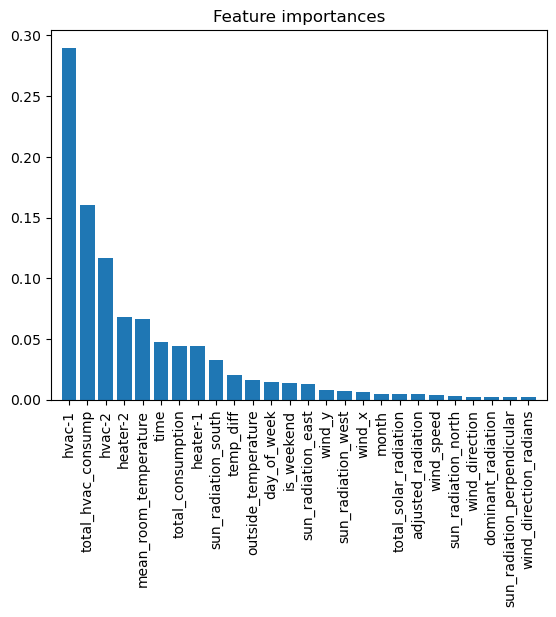

In [49]:
importances = Tmodel.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_2.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_2.shape[1]), X_train_2.columns[indices], rotation=90)
plt.xlim([-1, X_train_2.shape[1]])
plt.show()

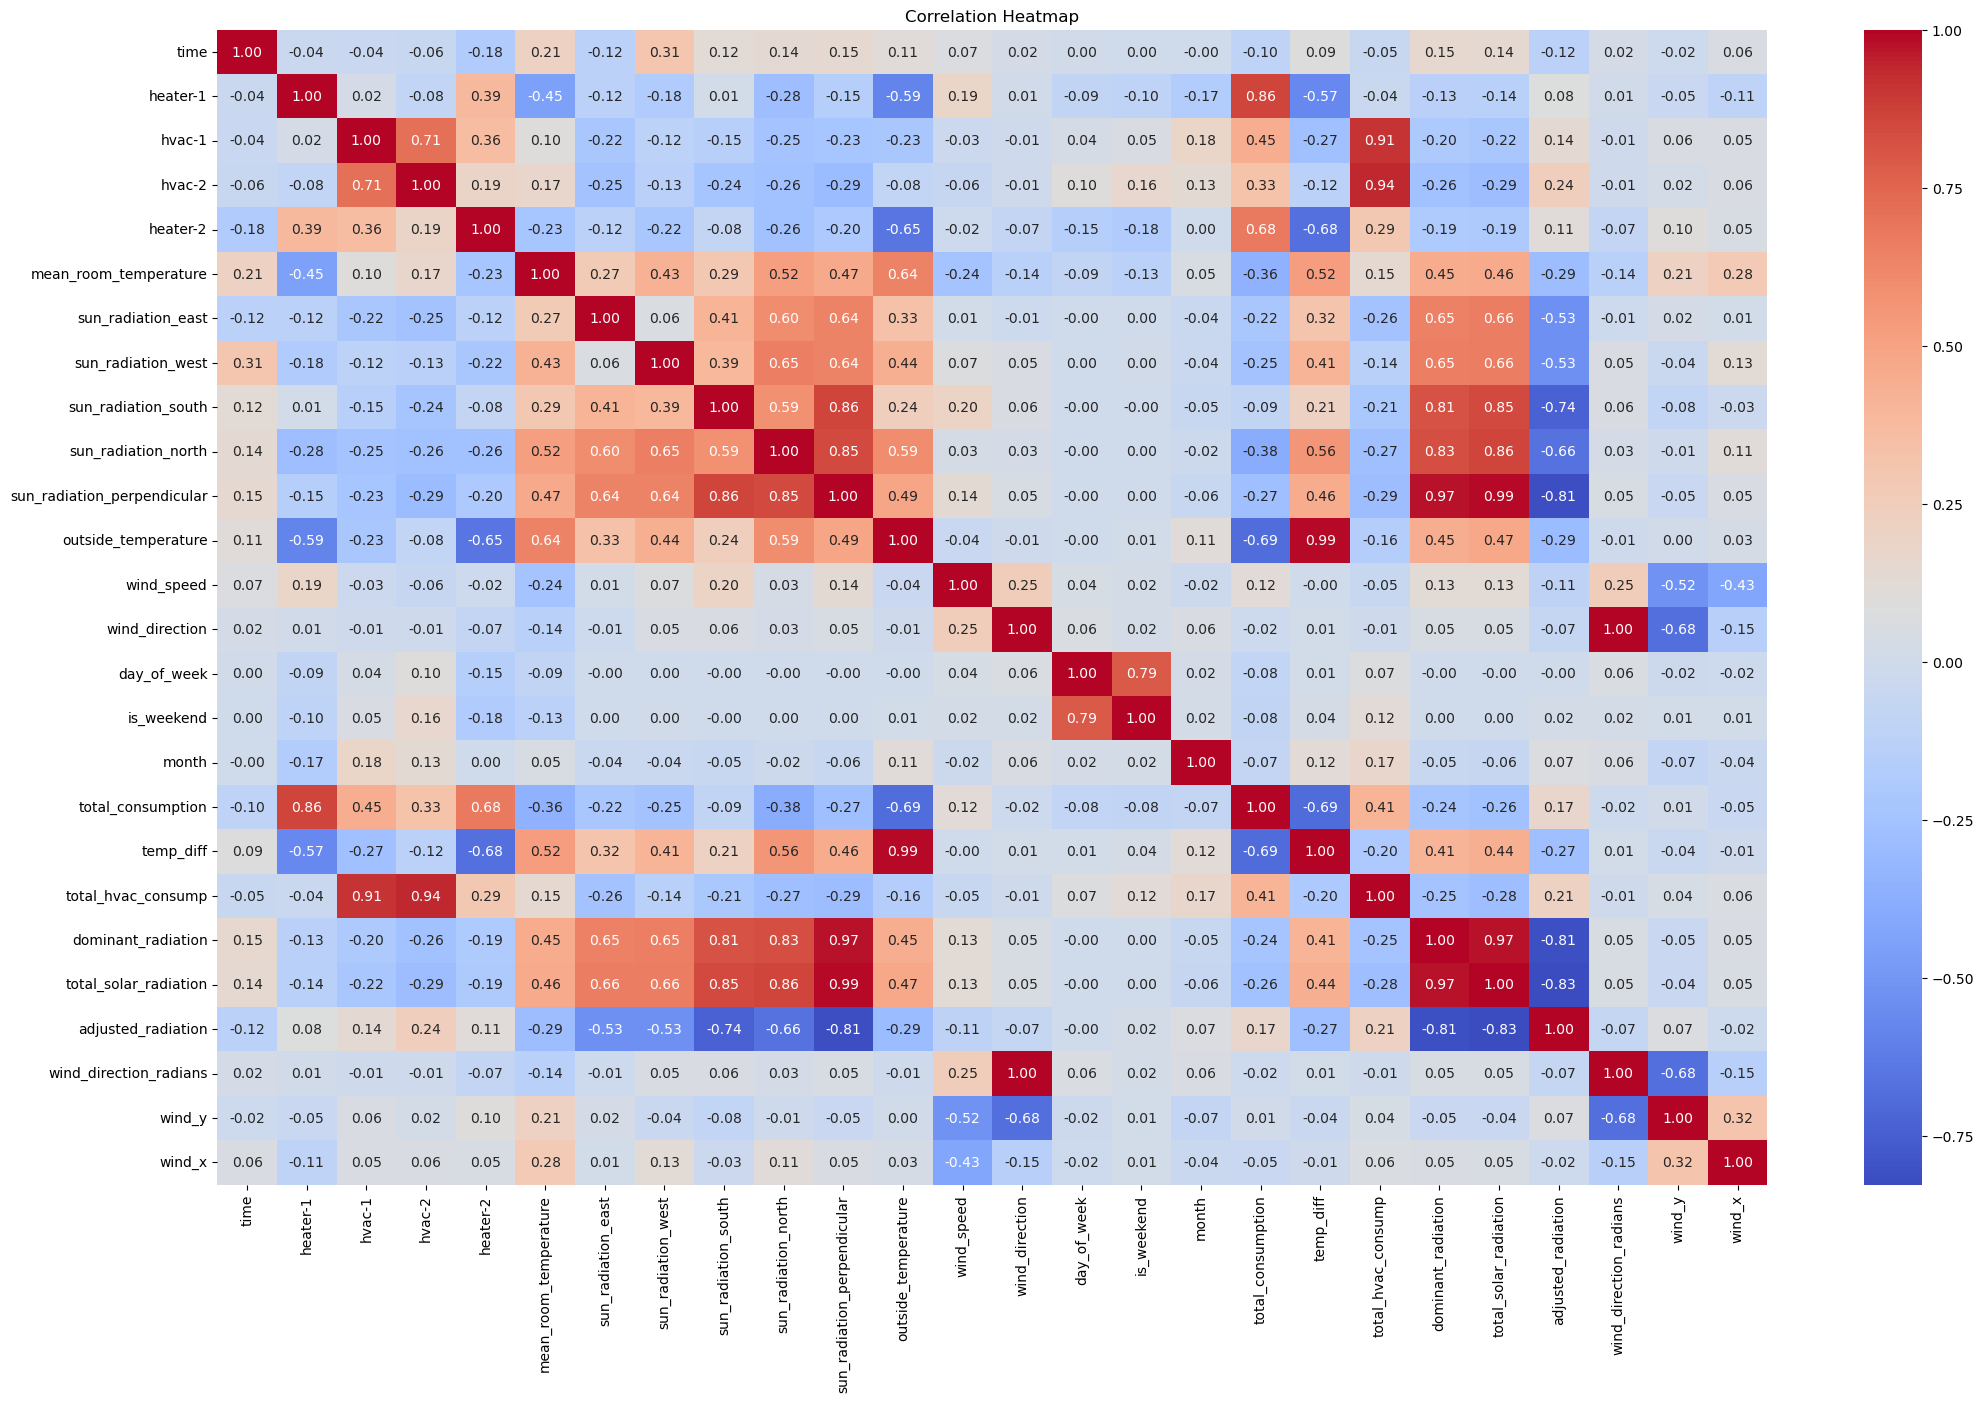

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = trainingDataTest.corr()

# Plot a heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [54]:

Tmodel.predict(ogTestData[features])


def submit(name, pred):
    sub = pd.DataFrame({'ID': ogTestData['ID'],
                        'target': pred})
    sub.to_csv(f'{name}.csv', index=False)
    
ogTestData

,ID,time,measurement_time,heater-1,hvac-1,hvac-2,heater-2,mean_room_temperature,sun_radiation_east,sun_radiation_west,...,month,total_consumption,temp_diff,total_hvac_consump,dominant_radiation,total_solar_radiation,adjusted_radiation,wind_direction_radians,wind_y,wind_x
0,7047,15,2024-08-20 15:00:00,40.349999,16.625000,16.325000,18.650000,21.171070,114.935484,622.645161,...,8,91.949999,2.258930,32.950000,622.645161,1419.096774,-26962.838710,3.490659,-2.110264,-5.797903
1,7048,16,2024-08-20 16:00:00,39.500000,19.333333,17.966667,19.033333,21.464404,97.774194,735.258065,...,8,95.833333,-2.364404,37.300000,735.258065,1339.322581,-52233.580645,3.665191,-2.830000,-4.901704
2,7049,17,2024-08-20 17:00:00,37.600001,19.566667,18.775000,19.150001,21.561250,76.612903,749.064516,...,8,95.091669,-2.331250,38.341667,749.064516,1133.935484,-21544.774194,4.014257,-1.578052,-1.324142
3,7050,18,2024-08-20 18:00:00,37.299999,19.350000,19.350000,19.050000,21.498269,52.967742,616.451613,...,8,95.050000,-2.668269,38.700000,616.451613,807.419355,-15340.967742,3.839724,-2.314035,-2.757760
4,7051,19,2024-08-20 19:00:00,33.025001,19.066667,19.750000,19.175001,21.417638,25.161290,301.096774,...,8,91.016668,-3.297638,38.816667,301.096774,442.000000,-8398.000000,3.839724,-1.651964,-1.968734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,8804,20,2024-11-01 20:00:00,31.625000,18.133334,17.950000,21.000000,20.354637,0.000000,0.000000,...,11,88.708334,-8.104637,36.083334,0.000000,0.000000,-0.000000,4.537856,-2.530956,-0.446276
1758,8805,21,2024-11-01 21:00:00,30.125000,18.266666,18.400000,20.975000,20.286458,0.000000,0.000000,...,11,87.766666,-8.066458,36.666666,0.000000,0.000000,-0.000000,4.537856,-2.028704,-0.357715
1759,8806,22,2024-11-01 22:00:00,29.700001,18.425000,18.766666,21.000000,20.219619,0.000000,0.000000,...,11,87.891667,-7.899619,37.191666,0.000000,0.000000,-0.000000,4.363323,-1.935767,-0.704561
1760,8807,23,2024-11-01 23:00:00,29.700001,18.633334,19.000000,20.925000,20.147907,0.000000,0.000000,...,11,88.258334,-8.107907,37.633334,0.000000,0.000000,-0.000000,5.934119,-1.231273,3.382893
